In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

In [2]:

train_size = 900
test_size = 1000
l1_lambda = 1e-4 


unique_binary_strings = set()
while len(unique_binary_strings) < train_size + test_size:
    binary_string = tuple(np.random.randint(2, size=30))
    unique_binary_strings.add(binary_string)

inputs = np.array(list(unique_binary_strings), dtype=np.float32)
outputs = np.sum(inputs[:, :3], axis=-1) % 2


ones_column = np.ones((inputs.shape[0], 1), dtype=np.float32)
inputs = np.concatenate((inputs, ones_column), axis=1)

indices = np.random.permutation(len(inputs))
split_idx = int(train_size)
X_train, y_train = inputs[indices[:split_idx]], outputs[indices[:split_idx]]
X_eval, y_eval = inputs[indices[split_idx:]], outputs[indices[split_idx:]]


In [3]:

model = Sequential()
model.add(Dense(10, input_dim=31, activation='relu', kernel_regularizer=l1(l1_lambda)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(l1_lambda)))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


class WeightTrackingCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.train_accuracies = []
        self.test_accuracies = []
        self.weights_over_time = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_accuracies.append(logs.get('accuracy'))
        self.test_accuracies.append(logs.get('val_accuracy'))


        weights, biases = self.model.layers[0].get_weights()
        self.weights_over_time.append(weights)


weight_tracking_callback = WeightTrackingCallback()


history = model.fit(X_train, y_train, epochs=500, batch_size=32, 
                    validation_data=(X_eval, y_eval), 
                    callbacks=[weight_tracking_callback])


loss, accuracy = model.evaluate(X_eval, y_eval)
print(f"Test Accuracy: {accuracy * 100:.2f}%")






Epoch 1/500


29/29 [==============================] - 2s 12ms/step - loss: 0.7282 - accuracy: 0.4822 - val_loss: 0.7214 - val_accuracy: 0.4960
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 0.7143 - accuracy: 0.5000 - val_loss: 0.7188 - val_accuracy: 0.4930
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7103 - accuracy: 0.4967 - val_loss: 0.7150 - val_accuracy: 0.4790
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5100 - val_loss: 0.7122 - val_accuracy: 0.4880
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.5200 - val_loss: 0.7113 - val_accuracy: 0.4950
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.5278 - val_loss: 0.7095 - val_accuracy: 0.4930
Epoch 7/500
29/29 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5167 - val_loss: 0.7091 - val_accuracy: 0.4980
Epoch 8/

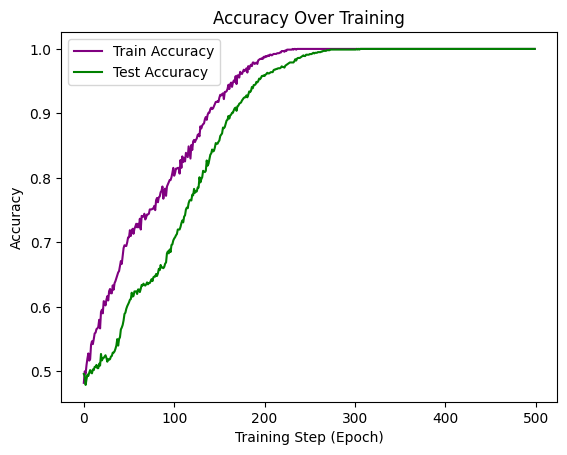

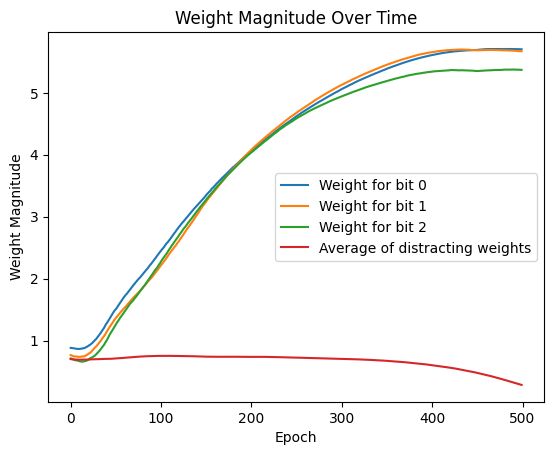

In [4]:

plt.plot(weight_tracking_callback.train_accuracies, label='Train Accuracy', color='purple')
plt.plot(weight_tracking_callback.test_accuracies, label='Test Accuracy', color='green')
plt.title('Accuracy Over Training')
plt.xlabel('Training Step (Epoch)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

weights_over_time = np.array(weight_tracking_callback.weights_over_time)
for i in range(3):
    plt.plot(np.linalg.norm(weights_over_time[:, i, :], axis=-1), label=f'Weight for bit {i}')
plt.plot(np.linalg.norm(weights_over_time[:, 3:, :], axis=-1).mean(axis=1), label='Average of distracting weights')
plt.title('Weight Magnitude Over Time')
plt.xlabel('Epoch')
plt.ylabel('Weight Magnitude')
plt.legend()
plt.show()

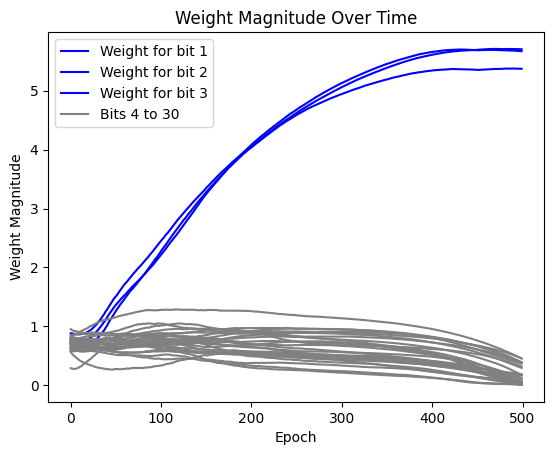

In [5]:
weights_over_time = np.array(weight_tracking_callback.weights_over_time)


for i in range(3):
    plt.plot(np.linalg.norm(weights_over_time[:, i, :], axis=-1), label=f'Weight for bit {i+1}', color='blue')


for i in range(3, 30):
    plt.plot(np.linalg.norm(weights_over_time[:, i, :], axis=-1), color='gray')


plt.title('Weight Magnitude Over Time')
plt.xlabel('Epoch')
plt.ylabel('Weight Magnitude')


plt.plot([], [], color='blue')
plt.plot([], [], color='gray', label='Bits 4 to 30')
plt.legend()

plt.show()


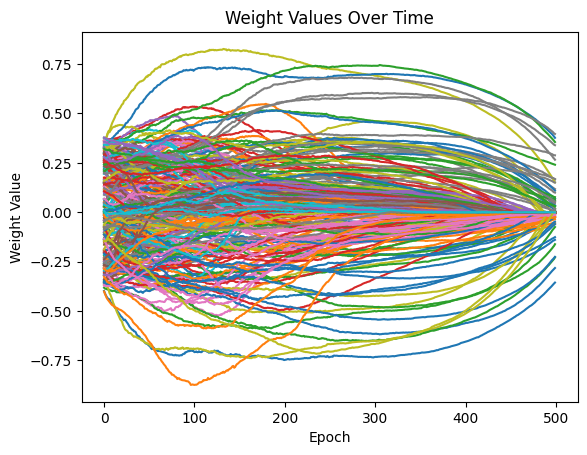

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_over_time = np.array(weight_tracking_callback.weights_over_time)


# Plot the average of distracting weights (from bit 3 onwards)
for i in range(4,30):   #Plot without the first 3 bits and bias
    for j in range(10):
        plt.plot(weights_over_time[:, i,j], label='Average of distracting weights')

# Add titles and labels for the axes
plt.title('Weight Values Over Time')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
#plt.legend()

# Display the plot
plt.show()


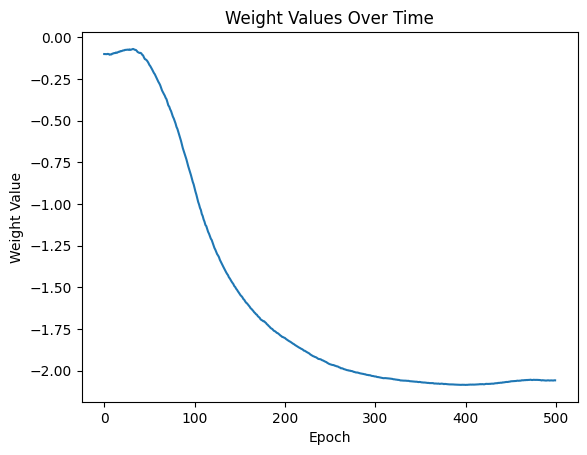

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_over_time = np.array(weight_tracking_callback.weights_over_time)

# Plot the average of distracting weights (from bit 3 onwards)
for i in [2]:   #Plot the bit 4
    for j in [4]:
        plt.plot(weights_over_time[:, i, j], label='Average of distracting weights')


plt.title('Weight Values Over Time')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')

plt.show()


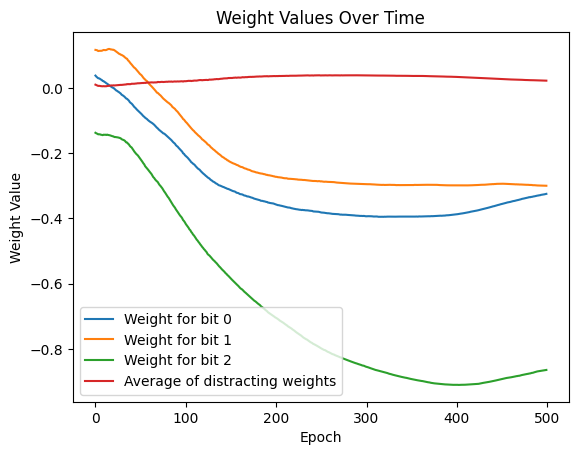

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_over_time = np.array(weight_tracking_callback.weights_over_time)

for i in range(3):
    plt.plot(weights_over_time[:, i, :].mean(axis=-1), label=f'Weight for bit {i}')

plt.plot(weights_over_time[:, 3:, :].mean(axis=(1, 2)), label='Average of distracting weights')


plt.title('Weight Values Over Time')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()


plt.show()


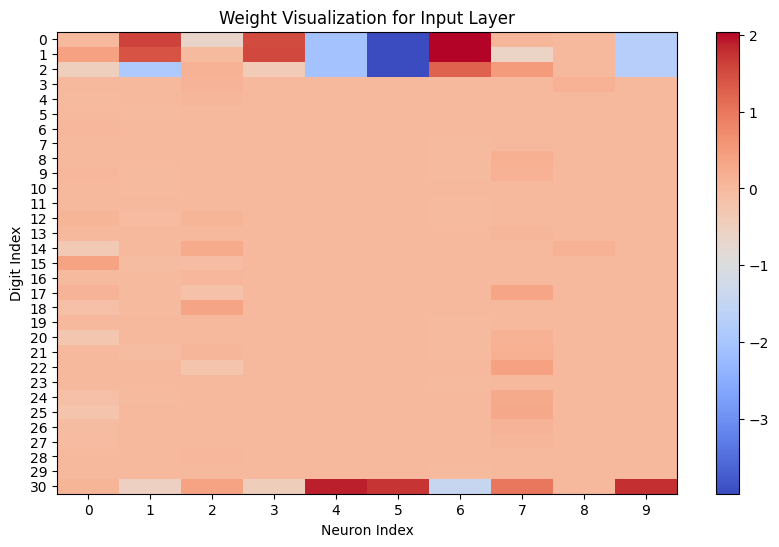

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

weights = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 6))
plt.imshow(weights, aspect='auto', cmap='coolwarm')

plt.colorbar()
plt.title('Weight Visualization for Input Layer')
plt.xlabel('Neuron Index')
plt.ylabel('Digit Index')
plt.xticks(ticks=np.arange(weights.shape[1]), labels=np.arange(weights.shape[1]))
plt.yticks(ticks=np.arange(weights.shape[0]), labels=np.arange(weights.shape[0]))

plt.show()

In [ ]:
for epoch, accuracy in enumerate(weight_tracking_callback.test_accuracies):
    if accuracy == 1.0: 
        print(f"First occurrence of 100% accuracy at epoch {epoch + 1}")
        break
else:
    print("100% accuracy was not reached.")

First occurrence of 100% accuracy at epoch 303
